In [1]:
import numpy as np
import keras
import random
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import keras.backend as K
import scipy.stats as stats
import math
import tensorflow as tf

In [2]:
baseline = 0.85
loss_alpha = 0.9
rnn_lr = 0.01 
rnn_decay = 0.1
no_of_nas_epochs = 20
no_of_samples_per_epoch = 10
max_no_of_layers = 6
rnn_dim = 100
rnn_train_epochs = 16
search_space_len = 382
search_space = np.linspace(1,search_space_len,search_space_len)
rew_coef = 5

In [3]:
def plot_distribution(samples, prob, next_):
    fig = plt.figure(figsize=(20, 2))
    plt.title("Last token of epoch")
    plt.axvline(x=next_, c="r", alpha=0.5)
    plt.plot(samples, prob)
    plt.axis('off')
    plt.show()

In [4]:
acc_model = keras.models.load_model("accuracy_predictor.h5")
def performance_estimate(sequence):
    seq_hot = keras.utils.to_categorical(sequence[:-1], num_classes=search_space_len+1)[np.newaxis]
    acc = acc_model.predict(seq_hot)[0][0]
    return round(acc, 3)

In [9]:
def discount_reward(rewards):
    discounted_reward = []
    for t in range(len(rewards)):
        dis_reward = 0
        for i, r in enumerate(rewards[t:]):
            dis_reward = loss_alpha**(i-t) * r
        discounted_reward.append(dis_reward)
    discounted_reward = tf.stack(discounted_reward)
    if len(rewards) > 1:
        discounted_reward = (discounted_reward - K.mean(discounted_reward)) / K.std(discounted_reward)
    return discounted_reward

In [8]:
def reinforce(y_true, y_pred):
    rewards = rew_coef * (data_acc - baseline)
    discounted_rewards = discount_reward(rewards)
    y_pred = K.clip(y_pred, 1e-36, 1e36)
    loss = - K.log(y_pred) * discounted_rewards[:, None]
    return loss

In [15]:
model = None
main_input = keras.engine.input_layer.Input(shape=(None, max_no_of_layers-1), batch_shape=None, name="main_input")
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(main_input)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
x = keras.layers.LSTM(rnn_dim, return_sequences=True)(x)
main_output = keras.layers.Dense(len(search_space), activation="softmax", name="main_output")(x)
model = keras.models.Model(inputs=[main_input], outputs=[main_output])

In [16]:
model.compile(loss={"main_output": reinforce}, optimizer=keras.optimizers.Adam(lr=rnn_lr, decay=rnn_decay, clipnorm=1.0))

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, None, 5)]         0         
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 100)         42400     
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 100)         80400     
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 100)         80400     
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 100)         80400     
_________________________________________________________________
main_output (Dense)          (None, None, 382)         38582     
Total params: 322,182
Trainable params: 322,182
Non-trainable params: 0
_____________________________________________________

In [6]:
# keras.utils.plot_model(model, "lstm.png", show_shapes=True)

NAS epoch 1
Epoch average accuracy (10 sequences): 0.541


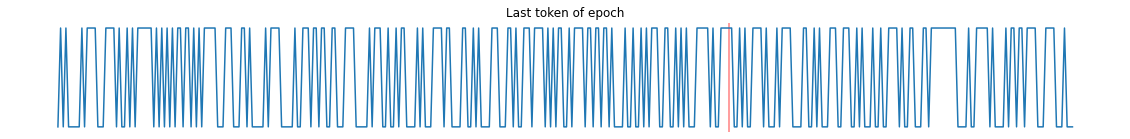

Training lstm ..
Rewards: [-1.32, -0.905, -1.675, -1.615, -1.67, -1.58, -1.675, -1.67, -1.67, -1.67]
lstm loss (epochs average): 3.4122567313943364e-06
NAS epoch 2
Epoch average accuracy (10 sequences): 0.798


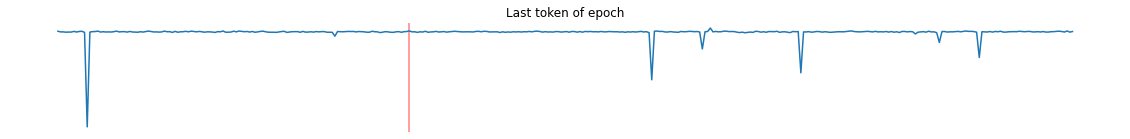

Training lstm ..
Rewards: [-0.26, -0.26, -0.27, -0.25, -0.27, -0.265, -0.26, -0.255, -0.265, -0.255]
lstm loss (epochs average): 3.983400205243015e-06
NAS epoch 3
Epoch average accuracy (10 sequences): 0.593


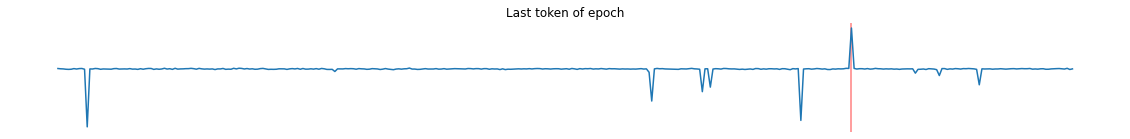

Training lstm ..
Rewards: [-0.44, -1.67, -1.655, -1.665, -1.64, -0.375, -1.67, -0.74, -1.52, -1.46]
lstm loss (epochs average): 4.05186753482667e-06
NAS epoch 4
Epoch average accuracy (10 sequences): 0.515


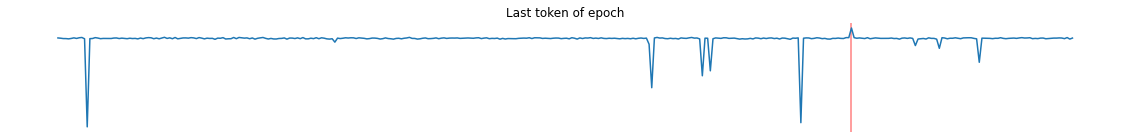

Training lstm ..
Rewards: [-1.67, -1.675, -1.675, -1.67, -1.675, -1.675, -1.675, -1.675, -1.675, -1.67]
lstm loss (epochs average): 4.167332065208029e-06
NAS epoch 5
Epoch average accuracy (10 sequences): 0.705


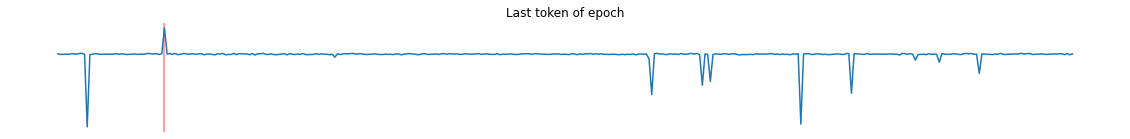

Training lstm ..
Rewards: [-0.295, -0.35, -0.345, -0.33, -1.665, -1.635, -0.42, -0.295, -0.245, -1.66]
lstm loss (epochs average): 4.1853695336158125e-06
NAS epoch 6
Epoch average accuracy (10 sequences): 0.713


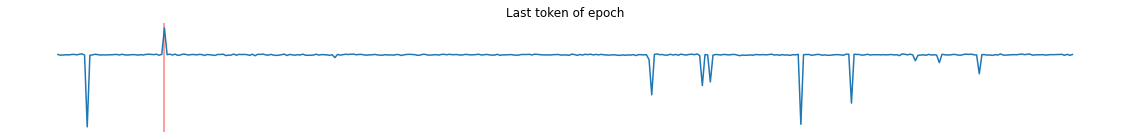

Training lstm ..
Rewards: [-0.335, -1.665, -0.235, -0.68, -0.42, -0.295, -0.47, -1.665, -0.245, -0.815]
lstm loss (epochs average): 4.162214224834315e-06
NAS epoch 7
Epoch average accuracy (10 sequences): 0.742


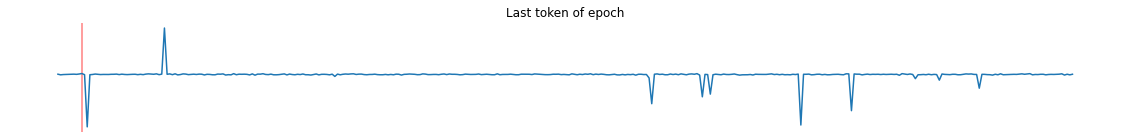

Training lstm ..
Rewards: [-0.345, -0.345, -1.66, -0.54, -0.295, -0.33, -0.35, -0.99, -0.335, -0.235]
lstm loss (epochs average): 4.240105937469707e-06
NAS epoch 8
Epoch average accuracy (10 sequences): 0.802


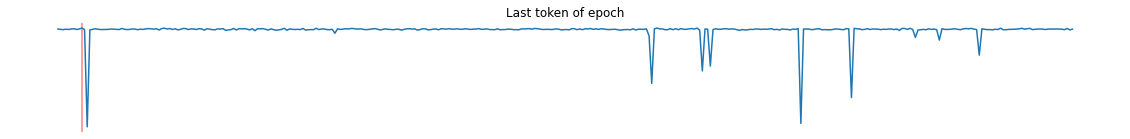

Training lstm ..
Rewards: [-0.21, -0.225, -0.19, -0.24, -0.25, -0.295, -0.305, -0.225, -0.21, -0.265]
lstm loss (epochs average): 4.367928255533116e-06
NAS epoch 9
Epoch average accuracy (10 sequences): 0.663


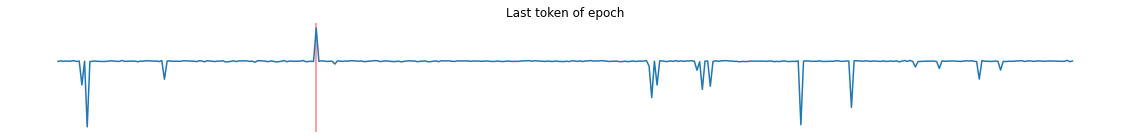

Training lstm ..
Rewards: [-0.75, -1.04, -0.435, -0.45, -1.465, -0.495, -0.72, -1.345, -1.56, -1.075]
lstm loss (epochs average): 4.397886584683874e-06
NAS epoch 10
Epoch average accuracy (10 sequences): 0.678


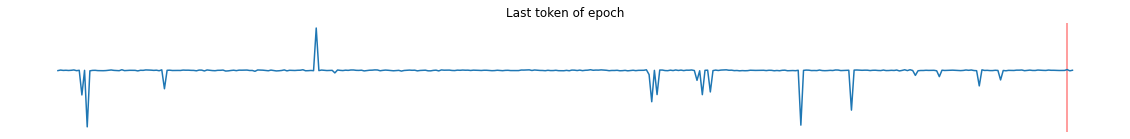

Training lstm ..
Rewards: [-0.435, -0.49, -1.235, -0.395, -0.955, -1.345, -1.645, -0.565, -0.505, -1.04]
lstm loss (epochs average): 4.37691568322407e-06
NAS epoch 11
Epoch average accuracy (10 sequences): 0.644


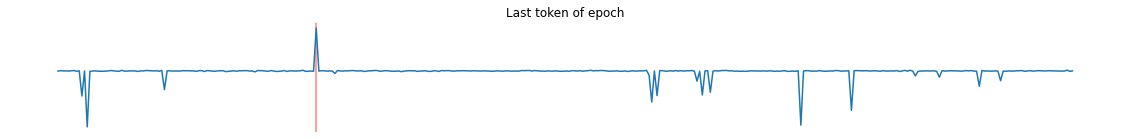

Training lstm ..
Rewards: [-0.45, -1.235, -0.955, -1.465, -0.765, -0.45, -1.54, -1.22, -1.13, -1.075]
lstm loss (epochs average): 4.3977617849577655e-06
NAS epoch 12
Epoch average accuracy (10 sequences): 0.669


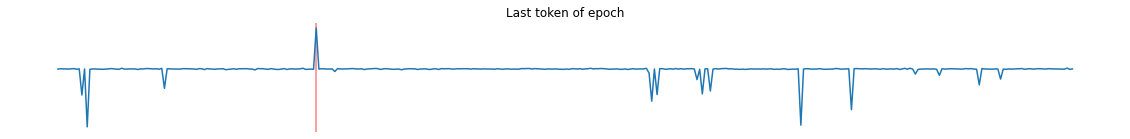

Training lstm ..
Rewards: [-0.495, -1.54, -0.72, -0.45, -1.22, -1.235, -0.45, -0.865, -1.13, -0.955]
lstm loss (epochs average): 4.363496856285565e-06
NAS epoch 13
Epoch average accuracy (10 sequences): 0.646


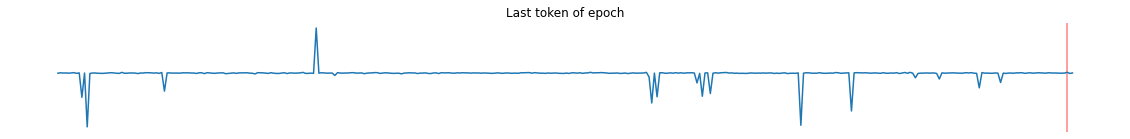

Training lstm ..
Rewards: [-0.565, -0.93, -1.22, -1.645, -1.04, -1.64, -0.49, -0.72, -1.465, -0.495]
lstm loss (epochs average): 4.291097496889051e-06
NAS epoch 14
Epoch average accuracy (10 sequences): 0.662


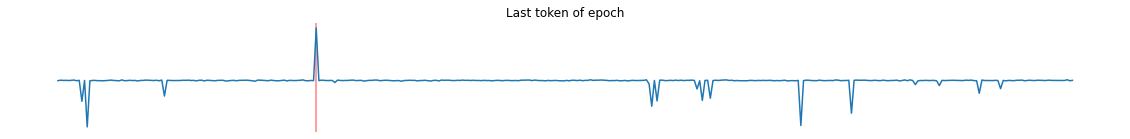

Training lstm ..
Rewards: [-1.64, -1.13, -1.075, -1.54, -0.44, -0.865, -1.04, -0.75, -0.46, -0.45]
lstm loss (epochs average): 4.303954625584083e-06
NAS epoch 15
Epoch average accuracy (10 sequences): 0.654


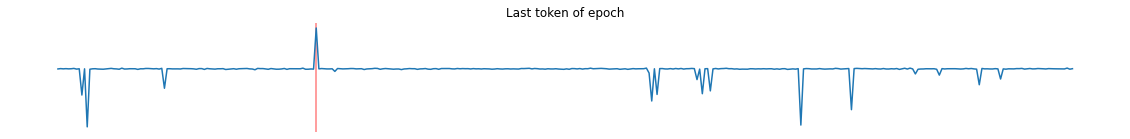

Training lstm ..
Rewards: [-1.56, -0.4, -0.49, -0.39, -0.495, -1.22, -1.465, -1.185, -1.075, -1.54]
lstm loss (epochs average): 4.434398277908258e-06
NAS epoch 16
Epoch average accuracy (10 sequences): 0.721


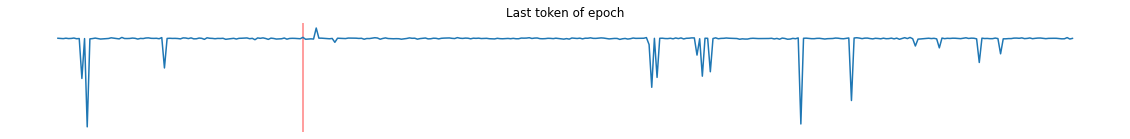

Training lstm ..
Rewards: [-0.39, -1.515, -0.365, -1.665, -0.355, -0.36, -0.66, -0.32, -0.31, -0.49]
lstm loss (epochs average): 4.564529888284596e-06
NAS epoch 17
Epoch average accuracy (10 sequences): 0.765


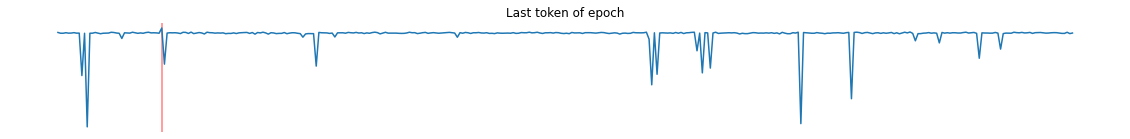

Training lstm ..
Rewards: [-1.635, -0.15, 0.125, 0.005, -0.205, -1.675, -0.61, -0.115, -0.28, 0.3]
lstm loss (epochs average): 4.6571511802540044e-06
NAS epoch 18
Epoch average accuracy (10 sequences): 0.798


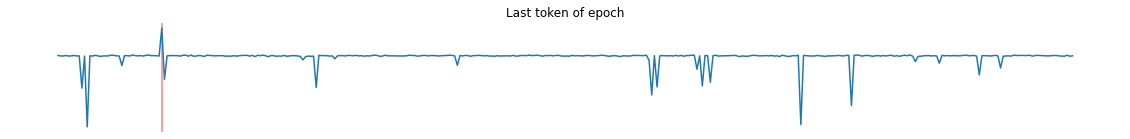

Training lstm ..
Rewards: [-0.115, 0.025, -0.18, 0.125, -1.675, -0.105, -0.095, -0.205, -0.25, -0.145]
lstm loss (epochs average): 4.638801641476675e-06
NAS epoch 19
Epoch average accuracy (10 sequences): 0.82


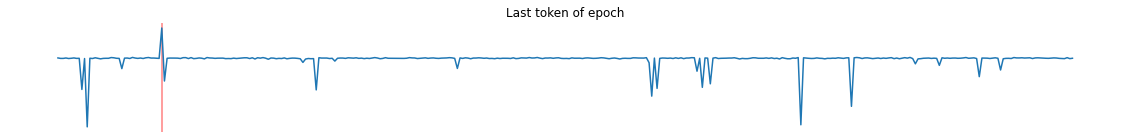

Training lstm ..
Rewards: [-0.13, -0.035, -0.075, -0.24, -0.32, -0.25, 0.035, -0.36, -0.085, -0.035]
lstm loss (epochs average): 4.60322610251751e-06
NAS epoch 20
Epoch average accuracy (10 sequences): 0.821


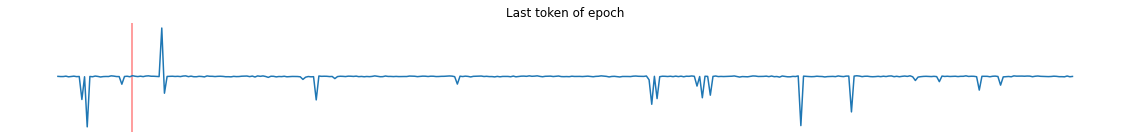

Training lstm ..
Rewards: [-0.035, -0.285, 0.03, -0.085, -0.035, -0.12, -0.25, -0.36, 0.035, -0.32]
lstm loss (epochs average): 4.52134000283877e-06
Done.


In [10]:
history_data_x = []
history_data_acc = []
history_lstm_loss = []
history_avg_acc = []
history_rewards = []

for nas_epoch in range(no_of_nas_epochs):
    sequences = []
    data_x = None
    accuracies = []
    data_acc = None
    print("NAS epoch", nas_epoch+1)
    sample_seq = 0
    while sample_seq < no_of_samples_per_epoch:
        sequence = np.zeros((1,1,max_no_of_layers-1), dtype="int32")
        layer = 0
        while layer < max_no_of_layers-1:
            distribution = model.predict(sequence)
            prob = distribution[0][0]
#             selected = np.random.choice(search_space, size=1, p=prob)[0]
            max_args = np.argsort(prob)[-2:]
            selected_idx = np.random.choice(max_args)
            selected = search_space[selected_idx]
            if not selected == 0:
                sequence[0][0][layer] = selected
                layer += 1
        
        sequence = sequence[0][0].tolist()
        sequence = sequence + [int(search_space[-1])]
        if sequence not in sequences:
            sequences.append(sequence)
            sequence_acc = performance_estimate(sequence)
            accuracies.append(sequence_acc)
            sample_seq += 1

#         sequence_acc = performance_estimate(sequence)
#         accuracies.append(sequence_acc)
        data_acc = np.vstack(accuracies)
    
    avg_acc = round(np.average(accuracies),3)
    print(f"Epoch average accuracy ({no_of_samples_per_epoch} sequences):", avg_acc)
    plot_distribution(search_space, prob, selected)
    print("Training lstm ..")
    rewards_ = (rew_coef * (data_acc - baseline)).tolist()
    print("Rewards:", [round(i[0], 4) for i in rewards_])
    data_x = np.array(sequences)[:, :-1].reshape(len(sequences), 1, max_no_of_layers-1)
    data_y = to_categorical(np.array(sequences)[:, -1], len(search_space)+1).reshape(len(sequences), 1, len(search_space)+1)
    history = model.fit({'main_input': data_x},
                        {'main_output': data_y},
                        epochs=rnn_train_epochs,
                        batch_size=len(data_x),
                        verbose=0)
    lstm_loss_avg = np.average(list(history.history.values())[0])
    print("lstm loss (epochs average):", lstm_loss_avg)
    
    history_avg_acc.append(avg_acc)
    history_lstm_loss.append(lstm_loss_avg)
    history_data_x.append(data_x)
    history_data_acc.append(data_acc)   
    history_rewards.append(rewards_) 
print("Done.")

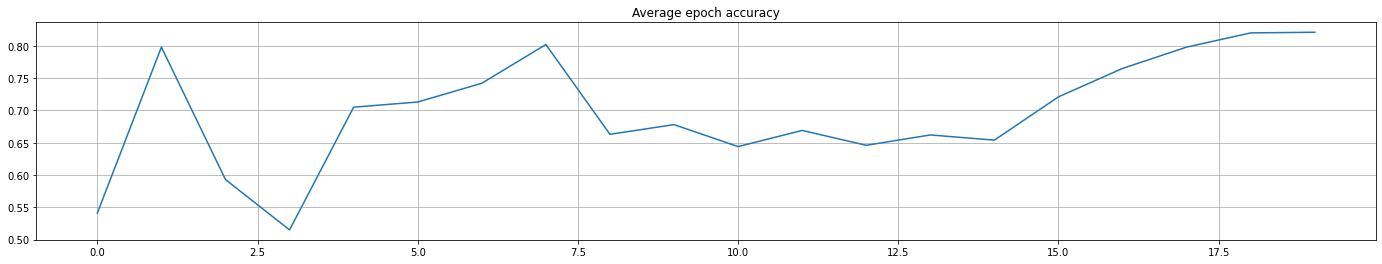

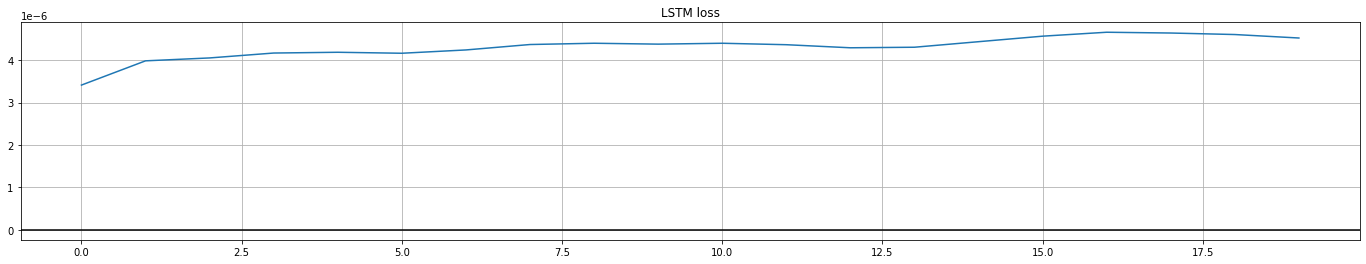

In [11]:
fig = plt.figure(figsize=(24, 4))
plt.plot(np.arange(0,len(history_avg_acc)), history_avg_acc)
plt.title("Average epoch accuracy")
plt.grid()
plt.show()
fig = plt.figure(figsize=(24, 4))
plt.plot(np.arange(0,len(history_lstm_loss)), history_lstm_loss)
plt.title("LSTM loss")
plt.axhline(y=0, c="k")
plt.grid()
plt.show()

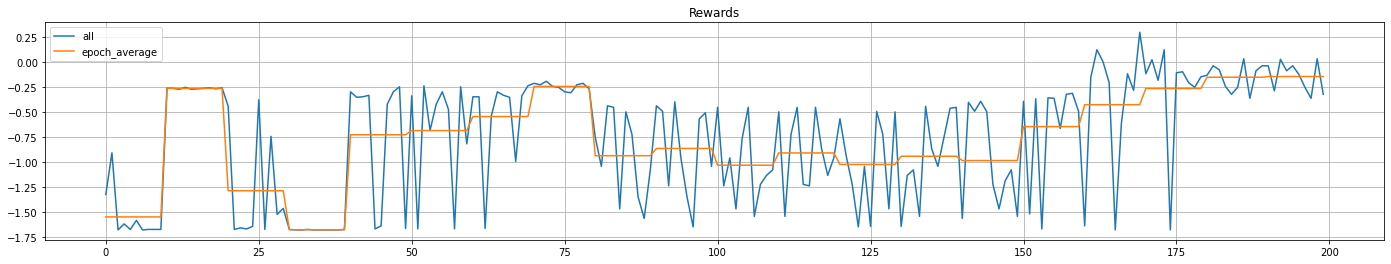

In [12]:
fig = plt.figure(figsize=(24, 4))
all_rew = np.array(history_rewards)
all_rew = all_rew.reshape(all_rew.shape[0]*all_rew.shape[1],1)

rewards_avg = [[np.average(i)]*no_of_samples_per_epoch for i in history_rewards]
rewards_avg = [item for sublist in rewards_avg for item in sublist]

plt.plot(np.arange(0,len(all_rew)), all_rew, label="all")
plt.plot(np.arange(0,len(rewards_avg)), rewards_avg, label="epoch_average")
plt.title("Rewards")
plt.legend()
plt.grid()
plt.show()

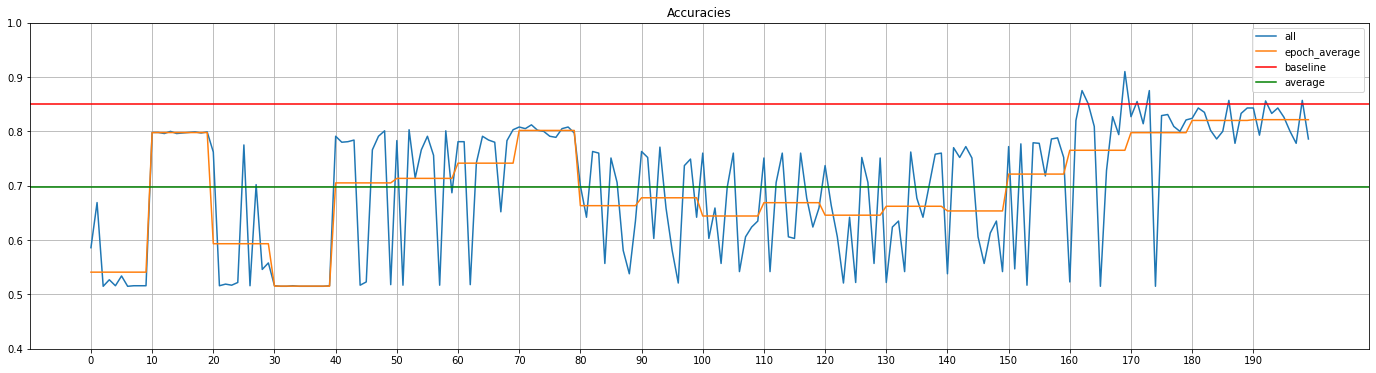

Total accuracy average: 0.697545
Best accuracy: 0.91


In [13]:
fig = plt.figure(figsize=(24, 6))
all_acc = np.array(history_data_acc)
all_acc = all_acc.reshape(all_acc.shape[0]*all_acc.shape[1],1)
plt.plot(np.arange(0,len(all_acc)), all_acc, label="all")

all_acc_avg = [[np.average(i)]*no_of_samples_per_epoch for i in history_data_acc]
all_acc_avg = [item for sublist in all_acc_avg for item in sublist]
plt.plot(np.arange(0,len(all_acc_avg)), all_acc_avg, label="epoch_average")

plt.axhline(y=baseline, c="r", label="baseline")
plt.axhline(y=np.average(all_acc), c="g", label="average")
plt.title("Accuracies")
plt.xticks(range(0,len(all_acc), no_of_samples_per_epoch))
plt.ylim([0.4,1])
plt.grid()
plt.legend()
plt.show()
print("Total accuracy average:", np.average(all_acc))
print("Best accuracy:", np.max(all_acc))

In [14]:
# random_acc = []
# for i in range(len(all_acc)):
#     random_acc.append(performance_estimate(np.random.randint(low=1, high=len(search_space), size=max_no_of_layers)))

# fig = plt.figure(figsize=(24, 6))
# plt.plot(np.arange(0,len(random_acc)), random_acc)
# plt.ylim([0,1])
# plt.grid()
# plt.xticks(range(0,len(all_acc), no_of_samples_per_epoch))
# plt.axhline(y=baseline, c="r")
# plt.axhline(y=np.average(random_acc), c="g")
# plt.title("Random")
# plt.show()
# print(np.average(random_acc))

In [15]:
# # ss = np.random.choice(search_space, size=1, p=prob, replace=False)
# ss = np.argsort(prob)[-5:]
# sss = np.random.choice(ss)

# fig = plt.figure(figsize=(20, 2))
# plt.title("Last token of epoch")
# plt.axvline(x=ss[0], c="r")
# plt.axvline(x=ss[1], c="r")
# plt.axvline(x=ss[2], c="r")
# plt.axvline(x=ss[3], c="r")
# plt.axvline(x=ss[4], c="r")
# plt.axvline(x=sss, c="g")
# plt.plot(search_space, prob)
# # plt.axis('off')
# # plt.xlim(226,228)
# plt.show()